In [2]:
# Importing the libraries 

import pandas as pd   #for data analysis
import numpy as np #for mathematical analysis
import matplotlib.pyplot as plt ##for data visualization
import seaborn as sns      ##for data visualization
%matplotlib inline

# Ignore harmless warnings 

import warnings 
warnings.filterwarnings("ignore")

# Set to display all the columns in dataset

pd.set_option("display.max_columns", None)

# Import psql to run queries 

import pandasql as psql

In [3]:
# Load the bank data
auto_insu_data = pd.read_csv(r"C:\Users\srila\Downloads\ml-intern\test2\Auto_Insurance_Claims.csv", header=0)

# Copy to back-up files

auto_insu_data_bk =auto_insu_data.copy()

# Display first 5 records

auto_insu_data.head(10)

,Inception_Date,Policy_Number,Policy_Type,Policy_Premium,Channel,State,Age,Gender,Marital_Status,Education,Profession,Driving_Exp,Vehicle_Usage,Annual_Miles,Previous_Citations,Prevous_Accidents,Coverage_Type,Claim_Number,Umbrella_Policy,Accident_Date,Police_File,Any_Eye_Witness,Hired_Attorney,Claim_Paid_Out,Make,Vehicle_Cost,Road_Type,Accident_Severity,Claimed
0,11/15/2017,HJ-160278596,Car,1232.13,EA,CA,47,Female,Married,High School,Worker,29,Pleasure,10561,0,0,Balanced,NaN,No,NaN,No,No,No,0.0,Honda,25829.90,NaN,NaN,No
1,12/30/2017,FO-150704678,Car,1678.09,EA,OR,70,Male,Married,High School,Carpenter,49,Pleasure,17325,0,0,Basic,NaN,No,NaN,No,No,No,0.0,Ford,23137.20,NaN,NaN,No
2,3/20/2019,BK-190076269,Van,1181.94,IA,OR,39,Male,Married,PhD,Professor,21,Pleasure,17720,0,0,Balanced,NaN,No,NaN,No,No,No,0.0,Isuzu,25102.00,NaN,NaN,No
3,10/10/2014,JR-133084982,Car,1492.48,EA,AZ,29,Male,Married,Masters,Lawyer,13,Commute,14691,0,0,Balanced,NaN,No,NaN,No,No,No,0.0,Chevrolet,23934.25,NaN,NaN,No
4,1/6/2019,ZH-196244130,Car,1740.18,EA,AZ,70,Female,Married,Masters,Engineer,53,Commute,14691,0,0,Balanced,NaN,No,NaN,No,No,No,0.0,Chevrolet,28198.15,NaN,NaN,No
5,11/26/2014,QN-177807636,Car,1428.13,EA,OR,36,Male,Married,High School,Carpenter,19,Business,20153,0,0,Basic,NaN,No,NaN,No,No,No,0.0,Honda,22796.25,NaN,NaN,No
6,11/30/2015,OE-180778567,Car,1557.48,EA,CA,74,Male,Married,Masters,Engineer,53,Pleasure,10561,0,0,Balanced,NaN,No,NaN,No,No,No,0.0,Honda,24489.55,NaN,NaN,No
7,3/1/2014,QI-195560365,Car,1726.48,EA,CA,48,Female,Married,Masters,IT_Engineer,30,Pleasure,16051,0,0,Balanced,NaN,No,NaN,No,No,No,0.0,Honda,17730.45,NaN,NaN,No
8,12/14/2015,QC-192138751,Car,1551.94,IA,NV,35,Male,Married,Masters,Lawyer,17,Pleasure,16410,0,0,Enhanced,NaN,No,NaN,No,No,No,0.0,Cadillac,16204.95,NaN,NaN,No
9,10/4/2018,PS-169879651,Car,1586.61,EA,NV,48,Female,Married,Bachelors,Architect,30,Business,28787,0,0,Enhanced,NaN,No,NaN,No,No,No,0.0,Mercedes,27826.00,NaN,NaN,No


In [5]:
auto_insu_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27225 entries, 0 to 27224
Data columns (total 29 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Inception_Date      27225 non-null  object 
 1   Policy_Number       27225 non-null  object 
 2   Policy_Type         27225 non-null  object 
 3   Policy_Premium      27225 non-null  float64
 4   Channel             27225 non-null  object 
 5   State               27225 non-null  object 
 6   Age                 27225 non-null  int64  
 7   Gender              27225 non-null  object 
 8   Marital_Status      27225 non-null  object 
 9   Education           27225 non-null  object 
 10  Profession          27225 non-null  object 
 11  Driving_Exp         27225 non-null  int64  
 12  Vehicle_Usage       27225 non-null  object 
 13  Annual_Miles        27225 non-null  int64  
 14  Previous_Citations  27225 non-null  int64  
 15  Prevous_Accidents   27225 non-null  int64  
 16  Cove

In [6]:
auto_insu_data.isnull().sum()

Inception_Date            0
Policy_Number             0
Policy_Type               0
Policy_Premium            0
Channel                   0
State                     0
Age                       0
Gender                    0
Marital_Status            0
Education                 0
Profession                0
Driving_Exp               0
Vehicle_Usage             0
Annual_Miles              0
Previous_Citations        0
Prevous_Accidents         0
Coverage_Type             0
Claim_Number          24047
Umbrella_Policy           0
Accident_Date         24047
Police_File               0
Any_Eye_Witness           0
Hired_Attorney            0
Claim_Paid_Out            0
Make                      0
Vehicle_Cost              0
Road_Type             24047
Accident_Severity     24047
Claimed                   0
dtype: int64

In [8]:
auto_insu_data.shape

(27225, 29)

In [9]:
#we can delete the column if it has huge no.of null values or 20% of data is null in that column
#and also delete the columns which are not influencing the target variable
del auto_insu_data['Inception_Date']
del auto_insu_data['Channel']
del auto_insu_data['Accident_Severity']
del auto_insu_data['Road_Type']
del auto_insu_data['Accident_Date']
del auto_insu_data['Claim_Number']
del auto_insu_data['Policy_Number']


In [10]:
auto_insu_data.head()

,Policy_Type,Policy_Premium,State,Age,Gender,Marital_Status,Education,Profession,Driving_Exp,Vehicle_Usage,Annual_Miles,Previous_Citations,Prevous_Accidents,Coverage_Type,Umbrella_Policy,Police_File,Any_Eye_Witness,Hired_Attorney,Claim_Paid_Out,Make,Vehicle_Cost,Claimed
0,Car,1232.13,CA,47,Female,Married,High School,Worker,29,Pleasure,10561,0,0,Balanced,No,No,No,No,0.0,Honda,25829.90,No
1,Car,1678.09,OR,70,Male,Married,High School,Carpenter,49,Pleasure,17325,0,0,Basic,No,No,No,No,0.0,Ford,23137.20,No
2,Van,1181.94,OR,39,Male,Married,PhD,Professor,21,Pleasure,17720,0,0,Balanced,No,No,No,No,0.0,Isuzu,25102.00,No
3,Car,1492.48,AZ,29,Male,Married,Masters,Lawyer,13,Commute,14691,0,0,Balanced,No,No,No,No,0.0,Chevrolet,23934.25,No
4,Car,1740.18,AZ,70,Female,Married,Masters,Engineer,53,Commute,14691,0,0,Balanced,No,No,No,No,0.0,Chevrolet,28198.15,No


In [11]:
auto_insu_data.duplicated().any()

False

In [12]:
auto_insu_data.isnull().sum()

Policy_Type           0
Policy_Premium        0
State                 0
Age                   0
Gender                0
Marital_Status        0
Education             0
Profession            0
Driving_Exp           0
Vehicle_Usage         0
Annual_Miles          0
Previous_Citations    0
Prevous_Accidents     0
Coverage_Type         0
Umbrella_Policy       0
Police_File           0
Any_Eye_Witness       0
Hired_Attorney        0
Claim_Paid_Out        0
Make                  0
Vehicle_Cost          0
Claimed               0
dtype: int64

In [15]:
auto_insu_data['Policy_Type'].value_counts()

Car      16519
Van       5518
Truck     5188
Name: Policy_Type, dtype: int64

In [19]:
# Character variables Gender to encode by using LabelEncoder

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

auto_insu_data['Policy_Type'] = le.fit_transform(auto_insu_data['Policy_Type'])
auto_insu_data['State'] = le.fit_transform(auto_insu_data['State'])
auto_insu_data['Gender'] = le.fit_transform(auto_insu_data['Gender'])
auto_insu_data['Marital_Status'] = le.fit_transform(auto_insu_data['Marital_Status'])
auto_insu_data['Education'] = le.fit_transform(auto_insu_data['Education'])
auto_insu_data['Profession'] = le.fit_transform(auto_insu_data['Profession'])
auto_insu_data['Vehicle_Usage'] = le.fit_transform(auto_insu_data['Vehicle_Usage'])
auto_insu_data['Coverage_Type'] = le.fit_transform(auto_insu_data['Coverage_Type'])
auto_insu_data['Umbrella_Policy'] = le.fit_transform(auto_insu_data['Umbrella_Policy'])
auto_insu_data['Police_File'] = le.fit_transform(auto_insu_data['Police_File'])
auto_insu_data['Any_Eye_Witness'] = le.fit_transform(auto_insu_data['Any_Eye_Witness'])
auto_insu_data['Hired_Attorney'] = le.fit_transform(auto_insu_data['Hired_Attorney'])
auto_insu_data['Make'] = le.fit_transform(auto_insu_data['Make'])
auto_insu_data['Claimed'] = le.fit_transform(auto_insu_data['Claimed'])


auto_insu_data.head(10)

,Policy_Type,Policy_Premium,State,Age,Gender,Marital_Status,Education,Profession,Driving_Exp,Vehicle_Usage,Annual_Miles,Previous_Citations,Prevous_Accidents,Coverage_Type,Umbrella_Policy,Police_File,Any_Eye_Witness,Hired_Attorney,Claim_Paid_Out,Make,Vehicle_Cost,Claimed
0,0,1232.13,1,47,0,1,1,14,29,2,10561,0,0,0,0,0,0,0,0.0,13,25829.90,0
1,0,1678.09,3,70,1,1,1,4,49,2,17325,0,0,1,0,0,0,0,0.0,11,23137.20,0
2,2,1181.94,3,39,1,1,3,11,21,2,17720,0,0,0,0,0,0,0,0.0,15,25102.00,0
3,0,1492.48,0,29,1,1,2,8,13,1,14691,0,0,0,0,0,0,0,0.0,6,23934.25,0
4,0,1740.18,0,70,0,1,2,5,53,1,14691,0,0,0,0,0,0,0,0.0,6,28198.15,0
5,0,1428.13,3,36,1,1,1,4,19,0,20153,0,0,1,0,0,0,0,0.0,13,22796.25,0
6,0,1557.48,1,74,1,1,2,5,53,2,10561,0,0,0,0,0,0,0,0.0,13,24489.55,0
7,0,1726.48,1,48,0,1,2,7,30,2,16051,0,0,0,0,0,0,0,0.0,13,17730.45,0
8,0,1551.94,2,35,1,1,2,8,17,2,16410,0,0,2,0,0,0,0,0.0,5,16204.95,0
9,0,1586.61,2,48,0,1,0,0,30,0,28787,0,0,2,0,0,0,0,0.0,19,27826.00,0


In [20]:
auto_insu_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27225 entries, 0 to 27224
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Policy_Type         27225 non-null  int64  
 1   Policy_Premium      27225 non-null  float64
 2   State               27225 non-null  int32  
 3   Age                 27225 non-null  int64  
 4   Gender              27225 non-null  int32  
 5   Marital_Status      27225 non-null  int32  
 6   Education           27225 non-null  int32  
 7   Profession          27225 non-null  int32  
 8   Driving_Exp         27225 non-null  int64  
 9   Vehicle_Usage       27225 non-null  int32  
 10  Annual_Miles        27225 non-null  int64  
 11  Previous_Citations  27225 non-null  int64  
 12  Prevous_Accidents   27225 non-null  int64  
 13  Coverage_Type       27225 non-null  int32  
 14  Umbrella_Policy     27225 non-null  int32  
 15  Police_File         27225 non-null  int32  
 16  Any_

In [21]:
#through correlation we can find the dependency between independent and target variables
auto_insu_data.corr()

,Policy_Type,Policy_Premium,State,Age,Gender,Marital_Status,Education,Profession,Driving_Exp,Vehicle_Usage,Annual_Miles,Previous_Citations,Prevous_Accidents,Coverage_Type,Umbrella_Policy,Police_File,Any_Eye_Witness,Hired_Attorney,Claim_Paid_Out,Make,Vehicle_Cost,Claimed
Policy_Type,1.000000,-0.028859,-0.235753,-0.130492,-0.005550,0.058396,0.012846,-0.005432,-0.120768,0.077464,0.128897,0.020528,-0.001630,-0.199412,0.020867,0.117254,0.123896,0.126269,0.010135,0.048143,0.031730,0.113285
Policy_Premium,-0.028859,1.000000,-0.081771,0.077693,-0.045756,0.034104,0.045277,0.086819,0.078375,0.017590,0.050188,0.083187,0.063429,0.073942,0.069598,0.161019,0.179524,0.211261,0.122451,0.007631,0.008929,0.160161
State,-0.235753,-0.081771,1.000000,-0.016932,0.048897,-0.034703,-0.197001,-0.057251,-0.016244,0.120007,-0.008054,0.040949,0.023508,0.114255,0.108051,0.055654,-0.128824,-0.170588,0.081614,0.057034,0.001588,0.064964
Age,-0.130492,0.077693,-0.016932,1.000000,0.052662,-0.455720,0.208520,0.053466,0.989820,-0.190664,0.190474,0.074954,0.120500,0.201390,0.218687,-0.092146,-0.125416,-0.133840,-0.130460,0.023845,0.039696,-0.096997
Gender,-0.005550,-0.045756,0.048897,0.052662,1.000000,-0.154435,0.123816,-0.081214,0.051879,-0.063305,0.088426,0.059342,0.092743,0.078260,0.055340,0.000405,0.068086,0.021718,0.004076,-0.083025,-0.020645,-0.000964
Marital_Status,0.058396,0.034104,-0.034703,-0.455720,-0.154435,1.000000,-0.232588,0.049012,-0.455063,0.233140,-0.168046,0.043937,0.031917,-0.202551,-0.171350,0.112754,0.138377,0.116528,0.138059,-0.072763,-0.024242,0.117866
Education,0.012846,0.045277,-0.197001,0.208520,0.123816,-0.232588,1.000000,0.191193,0.206353,-0.028464,0.046199,-0.119431,-0.168365,0.204118,0.099689,-0.013336,-0.004838,0.019568,-0.043990,0.021364,-0.029423,-0.018480
Profession,-0.005432,0.086819,-0.057251,0.053466,-0.081214,0.049012,0.191193,1.000000,0.056813,0.266186,-0.305537,-0.095315,-0.138365,-0.129714,-0.052296,0.123401,0.105212,0.061452,0.125626,-0.047964,-0.026388,0.115941
Driving_Exp,-0.120768,0.078375,-0.016244,0.989820,0.051879,-0.455063,0.206353,0.056813,1.000000,-0.196968,0.196649,0.077160,0.125329,0.202114,0.229321,-0.097197,-0.127605,-0.134573,-0.132305,0.026074,0.041897,-0.100554
Vehicle_Usage,0.077464,0.017590,0.120007,-0.190664,-0.063305,0.233140,-0.028464,0.266186,-0.196968,1.000000,-0.438066,0.075640,0.030431,-0.247781,-0.033548,0.231242,0.110517,0.130949,0.234517,-0.298657,-0.113332,0.238430


In [23]:
# Identify the Independent and Target variables

IndepVar = []
for col in auto_insu_data.columns:
    if col != 'Claimed':
        IndepVar.append(col)

TargetVar = 'Claimed'

x = auto_insu_data[IndepVar]
y = auto_insu_data[TargetVar]

In [24]:
# Split the data into train and test

from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=143)

# Display the shape of the train_data and test_data

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((19057, 21), (8168, 21), (19057,), (8168,))

In [25]:
# Scaling the features by using MinMaxScaler

from sklearn.preprocessing import MinMaxScaler

mmscaler = MinMaxScaler(feature_range=(0, 1))

x_train = mmscaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train)

x_test = mmscaler.fit_transform(x_test)
x_test = pd.DataFrame(x_test)

In [26]:
# Load the results dataset

EMResults = pd.read_csv(r"C:\Users\srila\Downloads\ml-intern\categorical\EMResults.csv", header=0)

# Display the first 5 records

EMResults.head()

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy


In [27]:
#counting the number of classes in target variable
auto_insu_data['Claimed'].value_counts()

0    24000
1     3225
Name: Claimed, dtype: int64

# classification algorithms
#here the target variable is catagorical ,so i'm are going to use classification algorithms

Model Name:  LogisticRegression()
Confusion matrix : 
 [[ 945   17]
 [   0 7206]]
Outcome values : 
 945 17 0 7206
Classification report : 
               precision    recall  f1-score   support

           1       1.00      0.98      0.99       962
           0       1.00      1.00      1.00      7206

    accuracy                           1.00      8168
   macro avg       1.00      0.99      0.99      8168
weighted avg       1.00      1.00      1.00      8168

Accuracy : 99.8 %
Precision : 100.0 %
Recall : 98.2 %
F1 Score : 0.991
Specificity or True Negative Rate : 100.0 %
Balanced Accuracy : 99.1 %
MCC : 0.99
roc_auc_score: 0.991


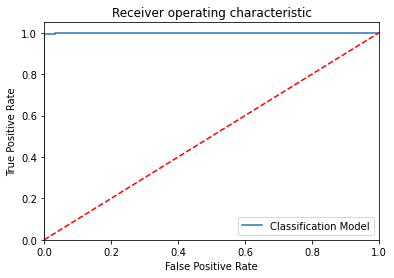

-----------------------------------------------------------------------------------------------------
Model Name:  DecisionTreeClassifier()
Confusion matrix : 
 [[ 961    1]
 [   2 7204]]
Outcome values : 
 961 1 2 7204
Classification report : 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00       962
           0       1.00      1.00      1.00      7206

    accuracy                           1.00      8168
   macro avg       1.00      1.00      1.00      8168
weighted avg       1.00      1.00      1.00      8168

Accuracy : 100.0 %
Precision : 99.8 %
Recall : 99.9 %
F1 Score : 0.998
Specificity or True Negative Rate : 100.0 %
Balanced Accuracy : 100.0 %
MCC : 0.998
roc_auc_score: 0.999


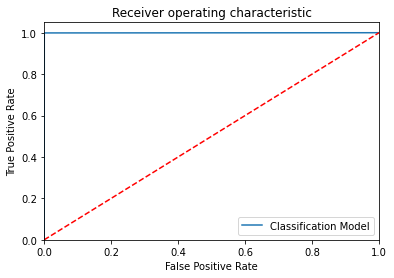

-----------------------------------------------------------------------------------------------------
Model Name:  RandomForestClassifier()
Confusion matrix : 
 [[ 961    1]
 [   0 7206]]
Outcome values : 
 961 1 0 7206
Classification report : 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00       962
           0       1.00      1.00      1.00      7206

    accuracy                           1.00      8168
   macro avg       1.00      1.00      1.00      8168
weighted avg       1.00      1.00      1.00      8168

Accuracy : 100.0 %
Precision : 100.0 %
Recall : 99.9 %
F1 Score : 0.999
Specificity or True Negative Rate : 100.0 %
Balanced Accuracy : 100.0 %
MCC : 0.999
roc_auc_score: 0.999


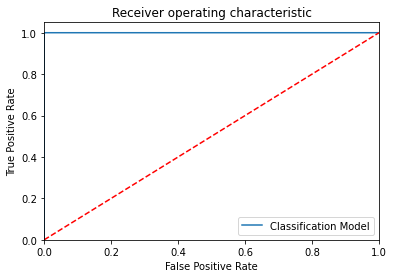

-----------------------------------------------------------------------------------------------------
Model Name:  ExtraTreesClassifier()
Confusion matrix : 
 [[ 959    3]
 [   0 7206]]
Outcome values : 
 959 3 0 7206
Classification report : 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00       962
           0       1.00      1.00      1.00      7206

    accuracy                           1.00      8168
   macro avg       1.00      1.00      1.00      8168
weighted avg       1.00      1.00      1.00      8168

Accuracy : 100.0 %
Precision : 100.0 %
Recall : 99.7 %
F1 Score : 0.998
Specificity or True Negative Rate : 100.0 %
Balanced Accuracy : 99.8 %
MCC : 0.998
roc_auc_score: 0.998


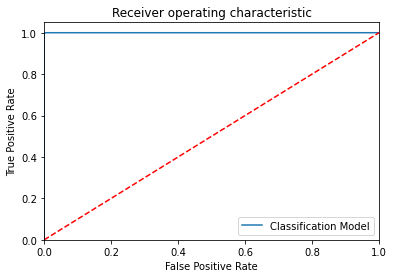

-----------------------------------------------------------------------------------------------------
Model Name:  KNeighborsClassifier()
Confusion matrix : 
 [[ 954    8]
 [   0 7206]]
Outcome values : 
 954 8 0 7206
Classification report : 
               precision    recall  f1-score   support

           1       1.00      0.99      1.00       962
           0       1.00      1.00      1.00      7206

    accuracy                           1.00      8168
   macro avg       1.00      1.00      1.00      8168
weighted avg       1.00      1.00      1.00      8168

Accuracy : 99.9 %
Precision : 100.0 %
Recall : 99.2 %
F1 Score : 0.996
Specificity or True Negative Rate : 100.0 %
Balanced Accuracy : 99.6 %
MCC : 0.995
roc_auc_score: 0.996


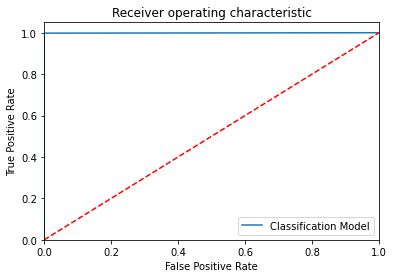

-----------------------------------------------------------------------------------------------------


In [29]:
# Build the Calssification models and compare the results

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier

# Create objects of classification algorithm with default hyper-parameters

ModelLR = LogisticRegression()
ModelDC = DecisionTreeClassifier()
ModelRF = RandomForestClassifier()
ModelET = ExtraTreesClassifier()
ModelKNN = KNeighborsClassifier(n_neighbors=5)



# Evalution matrix for all the algorithms

MM = [ModelLR, ModelDC, ModelRF, ModelET, ModelKNN]
for models in MM:
    
    # Fit the model
    
    models.fit(x_train, y_train)
    
    # Prediction
    
    y_pred = models.predict(x_test)
    y_pred_prob = models.predict_proba(x_test)
    
    # Print the model name
    
    print('Model Name: ', models)
    
    # confusion matrix in sklearn

    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report

    # actual values

    actual = y_test

    # predicted values

    predicted = y_pred

    # confusion matrix

    matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
    print('Confusion matrix : \n', matrix)

    # outcome values order in sklearn

    tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
    print('Outcome values : \n', tp, fn, fp, tn)

    # classification report for precision, recall f1-score and accuracy

    C_Report = classification_report(actual,predicted,labels=[1,0])

    print('Classification report : \n', C_Report)

    # calculating the metrics

    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);

    # Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
    # A model with a score of +1 is a perfect model and -1 is a poor model

    from math import sqrt

    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

    print('Accuracy :', round(accuracy*100, 2),'%')
    print('Precision :', round(precision*100, 2),'%')
    print('Recall :', round(sensitivity*100,2), '%')
    print('F1 Score :', f1Score)
    print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
    print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
    print('MCC :', MCC)

    # Area under ROC curve 

    from sklearn.metrics import roc_curve, roc_auc_score

    print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))
    
    # ROC Curve
    
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    logit_roc_auc = roc_auc_score(actual, predicted)
    fpr, tpr, thresholds = roc_curve(actual, models.predict_proba(x_test)[:,1])
    plt.figure()
    # plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()
    print('-----------------------------------------------------------------------------------------------------')
    #----------------------------------------------------------------------------------------------------------
    new_row = {'Model Name' : models,
               'True_Positive' : tp, 
               'False_Negative' : fn, 
               'False_Positive' : fp,
               'True_Negative' : tn,
               'Accuracy' : accuracy,
               'Precision' : precision,
               'Recall' : sensitivity,
               'F1 Score' : f1Score,
               'Specificity' : specificity,
               'MCC':MCC,
               'ROC_AUC_Score':roc_auc_score(actual, predicted),
               'Balanced Accuracy':balanced_accuracy}
    EMResults = EMResults.append(new_row, ignore_index=True)

In [30]:
EMResults.head(10)

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,LogisticRegression(),945,17,0,7206,0.998,1.0,0.982,0.991,1.0,0.99,0.991164,0.991
1,DecisionTreeClassifier(),961,1,2,7204,1.0,0.998,0.999,0.998,1.0,0.998,0.999341,1.0
2,"(DecisionTreeClassifier(max_features='auto', r...",961,1,0,7206,1.0,1.0,0.999,0.999,1.0,0.999,0.99948,1.0
3,"(ExtraTreeClassifier(random_state=366948614), ...",959,3,0,7206,1.0,1.0,0.997,0.998,1.0,0.998,0.998441,0.998
4,KNeighborsClassifier(),954,8,0,7206,0.999,1.0,0.992,0.996,1.0,0.995,0.995842,0.996


In [33]:
# Predict the values with RF algorithm
#we got better results for Random FOrest ,based on f1-score,precision,mcc

y_predF = ModelRF.predict(x_test)

In [34]:
Results = pd.DataFrame({'claimed_A':y_test, 'claimed_p':y_predF})

# Merge two Dataframes on index of both the dataframes

ResultsFinal = auto_insu_data.merge(Results, left_index=True, right_index=True)
ResultsFinal.sample(5)

,Policy_Type,Policy_Premium,State,Age,Gender,Marital_Status,Education,Profession,Driving_Exp,Vehicle_Usage,Annual_Miles,Previous_Citations,Prevous_Accidents,Coverage_Type,Umbrella_Policy,Police_File,Any_Eye_Witness,Hired_Attorney,Claim_Paid_Out,Make,Vehicle_Cost,Claimed,claimed_A,claimed_p
25388,2,1543.30,1,83,1,2,1,4,64,2,21406,0,0,1,0,1,1,1,11468.0,11,19551.00,1,1,1
8913,0,1405.24,1,64,1,1,3,10,43,1,23980,0,0,2,0,0,0,0,0.0,9,27236.80,0,0,0
10946,2,1682.10,1,62,1,1,3,3,46,0,27255,0,0,2,1,0,0,0,0.0,16,25346.75,0,0,0
976,2,1367.75,0,61,0,1,1,4,41,2,16410,0,0,0,0,0,0,0,0.0,14,14629.70,0,0,0
4578,0,2074.58,0,80,1,1,3,10,61,0,26683,0,0,2,0,0,0,0,0.0,17,25525.15,0,0,0


In [32]:
auto_insu_data['Claimed'].value_counts()
#here 0- no
# 1- yes

0    24000
1     3225
Name: Claimed, dtype: int64